In [1]:
import math, random
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

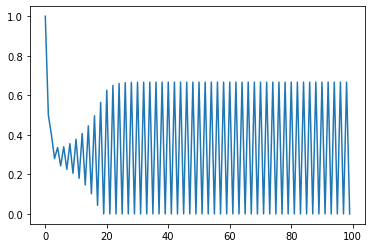

In [6]:
s = [1, 0.5]

new_value = lambda x1, x2: 0.4 * max(0, 1.0+x1-2.0*x2)

for i in range(2, 100):
  s.append(new_value(s[i-2], s[i-1]))

plt.plot(s)

In [ ]:
odds = np.array([n for n in range(5002) if n % 2 == 1])

inputs = odds[:-1]
labels = odds[1:]

print(inputs.shape)
print(labels.shape)

(2500,)
(2500,)


In [ ]:
model = models.Sequential()

model.add(layers.InputLayer(1))
model.add(layers.Dense(1, activation='linear'))

model.compile(optimizer='rmsprop', loss='mse')

model.summary()

history = model.fit(inputs, labels, epochs=50, batch_size=5, verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
500/500 [==============================] - 1s 1ms/step - loss: 327980.6562
Epoch 2/50
500/500 [==============================] - 1s 1ms/step - loss: 2.6123
Epoch 3/50
500/500 [==============================] - 1s 1ms/step - loss: 2.5859
Epoch 4/50
500/500 [==============================] - 1s 1ms/step - loss: 2.5031
Epoch 5/50
500/500 [==============================] - 1s 1ms/step - loss: 2.4186
Epoch 6/50
500/500 [==============================] - 1s 2ms/step - loss: 2.3190
Epoch 7/50
500/500 [==============================] - 1s 1ms/step - loss: 2.2588
Epoch 8/50
500/5

[array([[0.99997675]], dtype=float32), array([1.9872396], dtype=float32)]


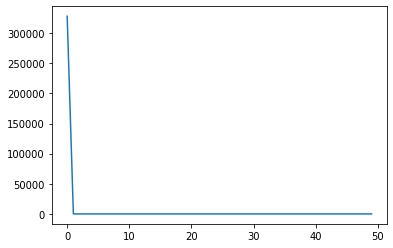

In [ ]:
history_dict = history.history

loss_values = history_dict['loss']

print(model.get_weights())
plt.plot(loss_values)

In [ ]:
prediction = model.predict([-50005])
print(prediction)

[[-50001.848]]


In [7]:
inputs_s = np.array([[s[i], s[i+1]] for i in range(len(s)-2)])
labels_s = np.array(s[2:])

print(inputs_s.shape)
print(labels_s.shape)

(98, 2)
(98,)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 24        
                                                                 
 dense_13 (Dense)            (None, 4)                 36        
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


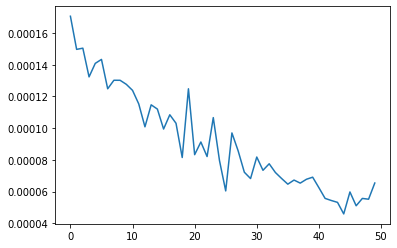

In [ ]:
model = models.Sequential()

model.add(layers.InputLayer(2))

model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

model.compile(optimizer='rmsprop', loss='mse')

model.summary()

history = model.fit(inputs_s, labels_s, epochs=50, batch_size=5, verbose=0)
history = model.fit(inputs_s, labels_s, epochs=50, batch_size=5, verbose=0)

history_dict = history.history

loss_values = history_dict['loss']

plt.plot(loss_values)

[[ 4.04047608e-01  4.00000000e-01]
 [ 2.80907482e-01  2.80000000e-01]
 [ 3.36140007e-01  3.36000000e-01]
 [ 2.42697954e-01  2.43200000e-01]
 [ 3.39544594e-01  3.39840000e-01]
 [ 2.24690467e-01  2.25408000e-01]
 [ 3.55312407e-01  3.55609600e-01]
 [ 2.04873174e-01  2.05675520e-01]
 [ 3.77473384e-01  3.77703424e-01]
 [ 1.79217547e-01  1.80107469e-01]
 [ 4.06862259e-01  4.06995395e-01]
 [ 1.45444155e-01  1.46446672e-01]
 [ 4.45636541e-01  4.45640820e-01]
 [ 1.04439437e-01  1.02066012e-01]
 [ 4.96769279e-01  4.96603518e-01]
 [ 6.52948022e-02  4.35435905e-02]
 [ 5.64196527e-01  5.63806535e-01]
 [ 4.46345806e-02  0.00000000e+00]
 [ 6.26255155e-01  6.25522614e-01]
 [ 2.25918889e-02  0.00000000e+00]
 [ 6.51311934e-01  6.50209046e-01]
 [ 8.53413343e-03  0.00000000e+00]
 [ 6.61334693e-01  6.60083618e-01]
 [ 2.91109085e-03  0.00000000e+00]
 [ 6.65343761e-01  6.64033447e-01]
 [ 6.61849976e-04  0.00000000e+00]
 [ 6.66118264e-01  6.65613379e-01]
 [-2.37822533e-04  0.00000000e+00]
 [ 6.66118264e-01  6

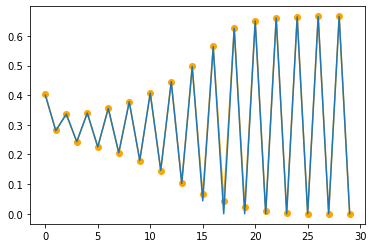

In [ ]:
prediction = model.predict(inputs_s[:30])

print(np.column_stack((prediction, labels_s[:30])))
plt.plot(prediction, 'o-', color='orange')
plt.plot(labels_s[:30])

In [22]:
model = models.Sequential()

model.add(layers.InputLayer((2,1)))

model.add(layers.SimpleRNN(4, return_sequences=True))
model.add(layers.SimpleRNN(4))
model.add(layers.Dense(1, activation='linear'))

model.compile(optimizer='rmsprop', loss='mse')

model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_12 (SimpleRNN)   (None, 2, 4)              24        
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 4)                 36        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


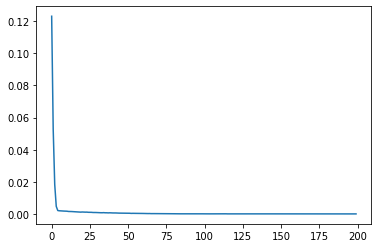

In [23]:
history = model.fit(inputs_s, labels_s, epochs=200, batch_size=5, verbose=0)
# history = model.fit(inputs_s, labels_s, epochs=50, batch_size=5, verbose=0)

history_dict = history.history

loss_values = history_dict['loss']

plt.plot(loss_values)

[[ 3.89941603e-01  4.00000000e-01]
 [ 3.07296157e-01  2.80000000e-01]
 [ 3.41409683e-01  3.36000000e-01]
 [ 2.40330681e-01  2.43200000e-01]
 [ 3.31528306e-01  3.39840000e-01]
 [ 2.18070656e-01  2.25408000e-01]
 [ 3.46175611e-01  3.55609600e-01]
 [ 1.99799240e-01  2.05675520e-01]
 [ 3.69464219e-01  3.77703424e-01]
 [ 1.77926496e-01  1.80107469e-01]
 [ 4.01009053e-01  4.06995395e-01]
 [ 1.50859371e-01  1.46446672e-01]
 [ 4.42962646e-01  4.45640820e-01]
 [ 1.18028395e-01  1.02066012e-01]
 [ 4.97925341e-01  4.96603518e-01]
 [ 7.95708075e-02  4.35435905e-02]
 [ 5.67758620e-01  5.63806535e-01]
 [ 3.66033465e-02  0.00000000e+00]
 [ 6.28694296e-01  6.25522614e-01]
 [ 7.34354556e-03  0.00000000e+00]
 [ 6.52166367e-01  6.50209046e-01]
 [ 2.78817117e-03  0.00000000e+00]
 [ 6.60643041e-01  6.60083618e-01]
 [ 1.03850663e-03  0.00000000e+00]
 [ 6.63894832e-01  6.64033447e-01]
 [ 3.49879265e-04  0.00000000e+00]
 [ 6.65174007e-01  6.65613379e-01]
 [ 7.61002302e-05  0.00000000e+00]
 [ 6.65682137e-01  6

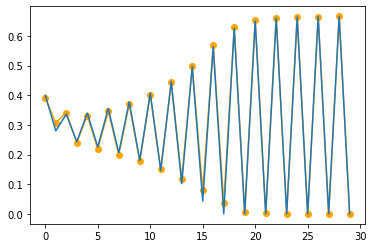

In [24]:
prediction = model.predict(inputs_s[:30])

print(np.column_stack((prediction, labels_s[:30])))
plt.plot(prediction, 'o-', color='orange')
plt.plot(labels_s[:30])